In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import string
import warnings
import missingno
warnings.filterwarnings('ignore')


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt



cf.go_offline(connected = True)


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt
import missingno


cf.go_offline(connected = True)


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import string
import warnings
import missingno

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('용역_입찰공고_내역_2020.csv',encoding ='utf-8',error_bad_lines= False)
df = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2019.csv',encoding ='utf-8',error_bad_lines= False)])
df = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2018.csv',encoding ='utf-8',error_bad_lines= False)])
df_용역_입찰공고_내역 = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2017.csv',encoding ='utf-8',error_bad_lines= False)])   

df = pd.read_csv('공사_입찰공고_및_진행_내역_2020.csv',encoding ='utf-8',error_bad_lines= False)
df = pd.concat([df,pd.read_csv('공사_입찰공고_및_진행_내역_2019.csv',encoding ='utf-8',error_bad_lines= False)])
df = pd.concat([df,pd.read_csv('공사_입찰공고_및_진행_내역_2018.csv',encoding ='utf-8',error_bad_lines= False)])
df_공사_입찰공고_및_진행_내역 = pd.concat([df,pd.read_csv('공사_입찰공고_및_진행_내역_2017.csv',encoding ='utf-8',error_bad_lines= False)])   


df = pd.read_csv('물품_입찰공고_내역_2020.csv',encoding ='utf-8',error_bad_lines= False)
df = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2019.csv',encoding ='utf-8',error_bad_lines= False)])
df = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2018.csv',encoding ='utf-8',error_bad_lines= False)])
df_물품_입찰공고_내역 = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2017.csv',encoding ='utf-8',error_bad_lines= False)])   

b'Skipping line 114239: expected 55 fields, saw 56\n'


In [3]:
def make_time_series_3(row):

    i = str(row['공고게시일자'])
    year = i[0:4]
    month = i[4:6]
    date =  i[6:8]

    row['공고게시일자'] = pd.to_datetime(year+month+date,format='%Y%m%d')

    return row

In [4]:
df_용역_입찰공고_내역_2 = df_용역_입찰공고_내역.apply(make_time_series_3,axis=1).copy()
df_공사_입찰공고_및_진행_내역_2 = df_공사_입찰공고_및_진행_내역.apply(make_time_series_3,axis=1).copy()
df_물품_입찰공고_내역_2 = df_물품_입찰공고_내역.apply(make_time_series_3,axis=1).copy()

In [5]:
df_공사_입찰공고_및_진행_내역_2.columns

Index(['등록유형', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '공고명', '공사현장',
       '입찰방식', '낙찰자결정적용법규', '낙찰자결정방법', '입찰계약방법', '예가방법', '긴급공고여부', '업종제한여부',
       '업종제한내용', '지역제한내용', '지역의무공동도급여부', '공동도급지역', '공동도급구성방식명', '기초금액',
       '관급자설치관급자재금액', '도급자설치관급자재금액', '추정금액', '추정가격', '예정가격', '입찰서개시일자',
       '입찰서마감일자', '개찰일자', '공고기관명', '공고기관코드', '실수요기관명', '수요기관명', '수요기관코드',
       '수요기관구분', '수요기관지역명', '입찰진행구분', '입찰진행내용', '낙찰자결정여부', '참가수',
       '개찰1순위업체목록내용', '개찰1순위투찰율', '개찰1순위투찰금액', '낙찰업체목록내용', '낙찰업체투찰률',
       '낙찰업체투찰금액', '낙찰하한율', '적격심사평가기준', '적격심사주공종', '적격심사주공종추정금액',
       '적격심사주공종추정가격', '적격심사업종평가비율', 'PQ심사접수방식', 'PQ심사신청서접수기한', '국제입찰여부',
       '국제입찰사유', '정정공고여부', '취소공고여부', '발주계획통합번호', '조달요청번호', '공공조달분류명',
       '사전규격등록번호', '참조번호', '이전입찰공고번호'],
      dtype='object')

In [6]:
df_용역_입찰공고_내역_2.columns

Index(['등록유형', '용역구분', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '공고명',
       '공고기관명', '실수요기관명', '수요기관명', '수요기관코드', '수요기관구분', '수요기관지역명', '품명내용',
       '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격',
       '배정예산', '입찰참가자격등록마감일자', '입찰서개시일자', '입찰서마감일자', '개찰일자', '입찰방식', '재입찰허용여부',
       '입찰계약방법', '낙찰자결정방법', '낙찰하한율', '예가방법', '업종제한여부', '업종제한내용', '지역제한내용',
       '공동도급구성방식명', '공동도급협정서접수방식', '공동도급협정서접수마감일자', '국제입찰여부', '국제입찰사유',
       '낙찰자결정적용법규', '조항호코드', '조항호명', '정보화사업여부', '기술평가대행여부', 'SW분리발주대상구분',
       'SW분리발주적용구분', '참조번호', '이전입찰공고번호', '사전규격등록번호', '조달요청번호', '발주계획통합번호',
       '규격검토일자', '실적심사신청서', '실적심사신청서신청기한'],
      dtype='object')

In [7]:
df_물품_입찰공고_내역_2.columns

Index(['등록유형', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '공고명', '공고기관명',
       '공고기관코드', '실수요기관명', '수요기관명', '수요기관코드', '수요기관구분', '수요기관지역명', '품명내용',
       '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격',
       '배정예산', '입찰참가자격등록마감일자', '입찰서개시일자', '입찰서마감일자', '개찰일자', '입찰방식', '재입찰허용여부',
       '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법', '업종제한여부', '업종제한내용', '지역제한내용',
       '공동도급구성방식명', '공동도급협정서접수방식', '공동도급협정서접수마감일자', '국제입찰여부', '국제입찰사유',
       '낙찰자결정적용법규', '조항호코드', '조항호명', '정보화사업여부', '기술평가대행여부', 'SW분리발주대상구분',
       'SW분리발주적용구분', '참조번호', '이전입찰공고번호', '사전규격등록번호', '조달요청번호', '발주계획통합번호',
       '규격검토일자'],
      dtype='object')

In [8]:
df_공사_입찰공고_및_진행_내역_2.columns

Index(['등록유형', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '공고명', '공사현장',
       '입찰방식', '낙찰자결정적용법규', '낙찰자결정방법', '입찰계약방법', '예가방법', '긴급공고여부', '업종제한여부',
       '업종제한내용', '지역제한내용', '지역의무공동도급여부', '공동도급지역', '공동도급구성방식명', '기초금액',
       '관급자설치관급자재금액', '도급자설치관급자재금액', '추정금액', '추정가격', '예정가격', '입찰서개시일자',
       '입찰서마감일자', '개찰일자', '공고기관명', '공고기관코드', '실수요기관명', '수요기관명', '수요기관코드',
       '수요기관구분', '수요기관지역명', '입찰진행구분', '입찰진행내용', '낙찰자결정여부', '참가수',
       '개찰1순위업체목록내용', '개찰1순위투찰율', '개찰1순위투찰금액', '낙찰업체목록내용', '낙찰업체투찰률',
       '낙찰업체투찰금액', '낙찰하한율', '적격심사평가기준', '적격심사주공종', '적격심사주공종추정금액',
       '적격심사주공종추정가격', '적격심사업종평가비율', 'PQ심사접수방식', 'PQ심사신청서접수기한', '국제입찰여부',
       '국제입찰사유', '정정공고여부', '취소공고여부', '발주계획통합번호', '조달요청번호', '공공조달분류명',
       '사전규격등록번호', '참조번호', '이전입찰공고번호'],
      dtype='object')

In [9]:
df_용역_입찰공고_내역_3 = df_용역_입찰공고_내역_2[['등록유형','공고게시일자','조달구분','입찰공고차수','수요기관명','수요기관코드','긴급공고여부',
'정정공고여부','취소공고여부','추정가격','입찰방식','낙찰자결정방법','입찰계약방법','예가방법','업종제한내용',
                                   '지역제한내용',]].copy()

df_물품_입찰공고_내역_3 = df_물품_입찰공고_내역_2[['등록유형','공고게시일자','조달구분','입찰공고차수','수요기관명','수요기관코드','긴급공고여부',
'정정공고여부','취소공고여부','추정가격','입찰방식','낙찰자결정방법','입찰계약방법','예가방법','업종제한내용',
                                   '지역제한내용',]].copy()

df_공사_입찰공고_및_진행_내역_3 = df_공사_입찰공고_및_진행_내역_2[['등록유형','공고게시일자','조달구분','입찰공고차수','수요기관명','수요기관코드','긴급공고여부',
'정정공고여부','취소공고여부','추정가격','입찰방식','낙찰자결정방법','입찰계약방법','예가방법','업종제한내용',
                                   '지역제한내용',]].copy()

In [10]:
df_용역_입찰공고_내역_3['구분'] = '용역'
df_물품_입찰공고_내역_3['구분'] = '물품'
df_공사_입찰공고_및_진행_내역_3['구분'] = '공사'

In [11]:
df_용역_물품_공사 = pd.concat([df_용역_입찰공고_내역_3,df_물품_입찰공고_내역_3,df_공사_입찰공고_및_진행_내역_3 ],axis=0)
df_용역_물품_공사

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,구분
0,나라장터(G2B),2020-03-31,자체조달,0,전라북도 정읍시,4690000,Y,N,N,87100000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,NaN,전라북도[45000],용역
1,나라장터(G2B),2020-03-31,자체조달,0,울산광역시 북구,3720000,N,N,N,42171818.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,[학술.연구용역(1169)],"부산광역시[26000], 울산광역시[31000], 경상남도[48000]",용역
2,나라장터(G2B),2020-03-31,자체조달,0,서울특별시,6110000,N,N,N,50000000.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,NaN,서울특별시[11000],용역
3,나라장터(G2B),2020-03-31,자체조달,1,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,Y,62630000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000],용역
4,나라장터(G2B),2020-03-31,자체조달,0,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,N,70980000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000],용역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136071,자체전자조달시스템,2017-12-27,자체조달,0,한국도로공사,B500004,N,N,N,0.0,전자입찰,적격심사,제한경쟁,NaN,NaN,"[27000]대구광역시, [48000]경상남도",공사
136072,자체전자조달시스템,2017-12-26,자체조달,0,한국수자원공사,B500001,N,N,N,0.0,전자입찰,적격심사,제한경쟁,NaN,NaN,[31000]울산광역시,공사
136073,자체전자조달시스템,2017-12-27,자체조달,0,한국도로공사,B500004,N,N,N,0.0,전자입찰,적격심사,일반경쟁,NaN,NaN,NaN,공사
136074,자체전자조달시스템,2017-10-30,자체조달,0,한국도로공사,B500004,N,N,N,0.0,전자입찰/직찰,기술제안,일반경쟁,NaN,NaN,NaN,공사


In [12]:
# df_용역_물품_공사.to_csv('용역_물품_공사.csv',encoding = 'cp949')

In [13]:
df_용역_입찰공고_내역_3['수요기관코드'].value_counts().head()

1690000    11161
6110000     6949
B500001     3798
1613000     2946
B500004     2405
Name: 수요기관코드, dtype: int64

In [14]:
df_공사_입찰공고_및_진행_내역_3['수요기관코드'].value_counts().head()

1690000    9322
4930000    3979
Z022872    3929
5710000    3284
4810000    3058
Name: 수요기관코드, dtype: int64

In [15]:
df_물품_입찰공고_내역_3['수요기관코드'].value_counts().head()

1690000    19311
ZZ99999     5143
1690000     4718
B553766     3472
B500001     3102
Name: 수요기관코드, dtype: int64

In [16]:
df_물품_입찰공고_내역_3.loc[:,'수요기관코드'] = df_물품_입찰공고_내역_3['수요기관코드'].astype('str')
df_공사_입찰공고_및_진행_내역_3.loc[:,'수요기관코드'] = df_공사_입찰공고_및_진행_내역_3['수요기관코드'].astype('str')
df_용역_입찰공고_내역_3.loc[:,'수요기관코드'] = df_용역_입찰공고_내역_3['수요기관코드'].astype('str')

In [17]:
df_물품_입찰공고_내역_3['수요기관코드'].value_counts().head()

1690000    24029
ZZ99999     5143
B553766     3472
B500001     3102
B551909     2415
Name: 수요기관코드, dtype: int64

In [18]:
df_물품_입찰공고_내역_3[df_물품_입찰공고_내역_3['수요기관코드'] == '1690000'].head()

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,구분
1305,나라장터(G2B),2020-03-12,중앙조달,0,방위사업청,1690000,NaN,N,N,1.993131e+08,전자입찰,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),복수예가,NaN,NaN,물품
34603,나라장터(G2B),2020-04-21,중앙조달,0,방위사업청,1690000,NaN,N,N,2.234611e+09,전자입찰,"적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)",일반(총액),복수예가,NaN,NaN,물품
37499,나라장터(G2B),2020-06-15,중앙조달,0,방위사업청,1690000,NaN,N,N,1.999110e+08,전자입찰,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),복수예가,NaN,NaN,물품
39026,나라장터(G2B),2020-05-25,중앙조달,0,방위사업청,1690000,Y,N,N,1.080189e+09,전자시담,수의(최저가),수의(총액),단일예가,NaN,NaN,물품
41381,나라장터(G2B),2020-04-25,중앙조달,0,방위사업청,1690000,NaN,N,N,1.080189e+09,전자입찰,적격심사(추정가격 10억원이상 제조입찰),일반(총액),복수예가,NaN,NaN,물품


In [19]:
df_용역 = df_용역_입찰공고_내역_3.loc[df_용역_입찰공고_내역_3['수요기관코드'] == '4930000'][['공고게시일자','추정가격']].copy()
df_공사 = df_공사_입찰공고_및_진행_내역_3.loc[df_공사_입찰공고_및_진행_내역_3['수요기관코드'] == '4930000'][['공고게시일자','추정가격']].copy()
df_물품 = df_물품_입찰공고_내역_3.loc[df_물품_입찰공고_내역_3['수요기관코드'] == '4930000'][['공고게시일자','추정가격']].copy()

In [20]:
 df_용역[df_용역['추정가격'] == 0]

,공고게시일자,추정가격


In [21]:
 df_공사[df_공사['추정가격'] == 0]

,공고게시일자,추정가격


In [22]:
 df_물품[df_물품['추정가격'] == 0]

,공고게시일자,추정가격


## 처음부터 추정가격이 0인 것은 추정가격이 정해지지 않는 부류에 속하므로, 빼야한다. (우리가 분석하려는 목적과 다름) 어떤 기관에는 추정가격이 0원인 부분이 있으므로(방위사업청;1690000) 그에 해당한다.

In [23]:
df_용역 = df_용역[df_용역['추정가격'] != 0].copy()
df_공사 = df_공사[df_공사['추정가격'] != 0].copy()
df_물품 = df_물품[df_물품['추정가격'] != 0].copy() 

In [24]:
df_용역_1w = df_용역.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
df_공사_1w =df_공사.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
df_물품_1w =df_물품.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()

In [25]:
df_용역_1w

,추정가격
공고게시일자,
2017-01-08,3.124491e+08
2017-01-15,2.733945e+08
2017-01-22,8.407809e+08
2017-01-29,1.641818e+07
2017-02-05,0.000000e+00
...,...
2020-11-22,5.157236e+08
2020-11-29,0.000000e+00
2020-12-06,6.826300e+08


In [26]:
df_용역_1w = df_용역_1w[df_용역_1w.index >= pd.to_datetime('2017-01-07') ].copy()
df_공사_1w = df_공사_1w[df_공사_1w.index >= pd.to_datetime('2017-01-07') ].copy()
df_물품_1w = df_물품_1w[df_물품_1w.index >= pd.to_datetime('2017-01-07') ].copy()

In [27]:
# f = df_용역.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).agg({'count','sum'})['추정가격']
# g  =df_공사.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).agg({'count','sum'})['추정가격']
# h  =df_물품.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).agg({'count','sum'})['추정가격']

# f = f[f.index >= pd.to_datetime('2018-01-07') ].copy()
# g = g[g.index >= pd.to_datetime('2018-01-07') ].copy()
# h = h[h.index >= pd.to_datetime('2018-01-07') ].copy()

# pd.concat([f,g,h],axis=0)

In [28]:
df_total = pd.concat([df_용역_1w, df_공사_1w, df_물품_1w],axis=1)

In [29]:
df_total.columns = ['용역', '공사' , '물품']

In [30]:
df_total[df_total['공사']>0]

,용역,공사,물품
공고게시일자,,,
2017-01-15,2.733945e+08,9.245000e+07,3.825209e+08
2017-01-22,8.407809e+08,1.666125e+09,0.000000e+00
2017-01-29,1.641818e+07,3.294964e+08,4.565454e+07
2017-02-05,0.000000e+00,2.936454e+07,0.000000e+00
2017-02-12,6.046673e+08,1.327462e+09,3.000000e+07
...,...,...,...
2020-11-29,0.000000e+00,1.269888e+09,1.678287e+09
2020-12-06,6.826300e+08,2.024784e+09,7.213091e+07
2020-12-13,4.615000e+08,4.334860e+09,6.746114e+08


In [31]:
df_total.fillna(0)['용역'].iplot(title = '용역')
df_total.fillna(0)['공사'].iplot(title = '공사')
df_total.fillna(0)['물품'].iplot(title = '물품')

## 추세가 보이지 않으나, 향후 이에 대해서 보아야 될 필요가 있다. (ARIMA를 보면서 자세히 다룰 예정이다.)

In [32]:
df_total.fillna(0).corr() 

,용역,공사,물품
용역,1.000000,0.053794,0.052209
공사,0.053794,1.000000,0.041936
물품,0.052209,0.041936,1.000000


In [33]:
df_total = df_total.fillna(0).copy()

In [34]:
from scipy.stats import f

def t_square(data ,alpha: float = None):
    
    array_data = np.array(data)

    
    p = array_data.shape[1]
    m = array_data.shape[0]
    n = 1
    col_mean= np.array(data.agg(['mean']))
    mat_cov = data.cov()
    mat_inv_s = np.linalg.inv(mat_cov)  # inverse S
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = np.matmul(np.matmul(dif,mat_inv_s),dif.T).ravel().tolist()  # T-square
        values.append(value)
    
    LCL = 0
    UCL = ( ( p * (m+1) * (m-1) ) / (m * (m - p)) ) * f.ppf((1-alpha), p, m-p)
            
    return values, LCL, UCL 

In [35]:
data_point, t_lcl, t_ucl = t_square(df_total,alpha=0.05)

In [36]:
df_data = pd.DataFrame(data_point,columns=['data_point'])
df_data['ucl'] = t_ucl
df_data['lcl'] = t_lcl
df_data['control'] = 0

In [37]:
for i in range(len(df_data)):
    if df_data.loc[i,'data_point'] > t_ucl:
        df_data.loc[i,'control']  = 'red'
    else:
        df_data.loc[i,'control']  = 'blue'

In [38]:
df_data

,data_point,ucl,lcl,control
0,0.887835,8.060821,0,blue
1,0.529144,8.060821,0,blue
2,0.599409,8.060821,0,blue
3,0.940321,8.060821,0,blue
4,1.185340,8.060821,0,blue
...,...,...,...,...
204,0.299815,8.060821,0,blue
205,1.237651,8.060821,0,blue
206,6.134669,8.060821,0,blue
207,1.115259,8.060821,0,blue


In [39]:

fig = go.Figure()


fig.add_trace(go.Scatter(x = df_data.index, y =df_data['data_point'],mode = 'lines+markers',name= 'Data_point',
                                 marker=dict(
                        color=df_data['control'],
                        size=5)))


fig.add_trace(go.Scatter(x = df_data.index ,y = df_data['lcl']  ,mode= 'lines',name= 'LCL',marker_color = 'gray'))
fig.add_trace(go.Scatter(x = df_data.index ,y = df_data['ucl']  ,mode= 'lines',name= 'UCL'))



fig.update_layout({
    'title' : '물품 / 용역 / 공사의 통합 T_square 관리도 (Not bootstraps)'
})





fig.show()

## 이 부분은 내가 잘못 인지하였다. 배정예산이 지정된 후, 추정가격이 만들어질 것이라고 생각하였는데, 전체적인 데이터를 보니(물품/공사/용역을 합해보니) 추정가격이 먼저라는 것을 알 수 있었다. 그러므로, 추정가격에 대해서 Multivariate_t_square를 그려보았다.

## 이제 어디서 금액이 평소보다 더 많이 변동이 많고, 평균으로부터 많이 떨어져 있는지 보자.

In [40]:
out_of_control = df_data[df_data['control'] == 'red'].index.tolist()

In [41]:
df_total.reset_index().iloc[out_of_control]

,공고게시일자,용역,공사,물품
23,2017-06-18,1.168784e+09,5.644728e+09,2.000000e+09
37,2017-09-24,2.221000e+07,3.133982e+08,2.601346e+09
49,2017-12-17,2.403545e+08,9.679282e+09,0.000000e+00
107,2019-01-27,1.473872e+09,2.554938e+09,3.076364e+09
119,2019-04-21,0.000000e+00,2.523270e+10,8.289209e+08
123,2019-05-19,4.321391e+08,1.130297e+10,2.727273e+07
133,2019-07-28,1.148914e+09,6.285936e+08,3.039245e+09
150,2019-11-24,2.603273e+08,1.239693e+10,1.430000e+08
166,2020-03-15,1.025142e+09,1.000415e+10,3.159927e+08
170,2020-04-12,5.196774e+09,4.485720e+09,6.108900e+08


In [42]:
out_of_control

[23, 37, 49, 107, 119, 123, 133, 150, 166, 170, 175, 181, 188, 196, 197, 203]

In [43]:
df_data

,data_point,ucl,lcl,control
0,0.887835,8.060821,0,blue
1,0.529144,8.060821,0,blue
2,0.599409,8.060821,0,blue
3,0.940321,8.060821,0,blue
4,1.185340,8.060821,0,blue
...,...,...,...,...
204,0.299815,8.060821,0,blue
205,1.237651,8.060821,0,blue
206,6.134669,8.060821,0,blue
207,1.115259,8.060821,0,blue


In [44]:
import scipy
scipy.stats.chi2(1).ppf(0.99)

6.6348966010212145

In [45]:
from scipy.stats import f
def t_square(data ,alpha: float = None):
    
    array_data = np.array(data)

    
    p = array_data.shape[1]
    m = array_data.shape[0]
    n = 1
    col_mean= np.array(data.agg(['mean']))
    mat_cov = data.cov()
    mat_inv_s = np.linalg.inv(mat_cov)  # inverse S
    
    values = []
    for sample in array_data:
        dif = sample - col_mean
        value = np.matmul(np.matmul(dif,mat_inv_s),dif.T).ravel().tolist()  # T-square
        values.append(value)
    
    LCL = 0
    UCL = ( ( p * (m+1) * (m-1) ) / (m * (m - p)) ) * f.ppf((1-alpha), p, m-p)
            
    return values, LCL, UCL 

In [46]:
def t_square_interpret(code,alpha: float = None):
    
    def color_positive_red(val):

        if val > cutoff:
            color = 'red'
        else:
            color = 'black'

        return 'color: %s' % color    

    df_용역 = df_용역_입찰공고_내역_3.loc[df_용역_입찰공고_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_공사 = df_공사_입찰공고_및_진행_내역_3.loc[df_공사_입찰공고_및_진행_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_물품 = df_물품_입찰공고_내역_3.loc[df_물품_입찰공고_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_용역 = df_용역[df_용역['추정가격'] != 0].copy()
    df_공사 = df_공사[df_공사['추정가격'] != 0].copy()
    df_물품 = df_물품[df_물품['추정가격'] != 0].copy() 

    df_용역_1w = df_용역.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
    df_공사_1w =df_공사.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
    df_물품_1w =df_물품.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()


    df_용역_1w = df_용역_1w[df_용역_1w.index >= pd.to_datetime('2017-01-07') ].copy()
    df_공사_1w = df_공사_1w[df_공사_1w.index >= pd.to_datetime('2017-01-07') ].copy()
    df_물품_1w = df_물품_1w[df_물품_1w.index >= pd.to_datetime('2017-01-07') ].copy()
    
    df_total = pd.concat([df_용역_1w, df_공사_1w, df_물품_1w],axis=1)
    df_total.columns = ['용역', '공사' , '물품']
    
    data = df_total.fillna(0).copy()


    # 데이터프레임의 형태는 df_total의 형태와 동일하여야 한다.
    chi2 = alpha
    
    try:
        T_values, LCL, UCL  = t_square(data ,chi2)
        
    except np.linalg.LinAlgError as e:
        
        if 'Singular matrix' in str(e):
            print('공사 / 물품 / 용역 중 하나의 열 전체가 0 입니다. 데이터의 형태를 다시 확인하십시오')
            return data
        else:
            print('행렬 계산 중 무언가 잘못되었습니다.')
            raise
        
    except ZeroDivisionError:
        print('데이터의 형태가 이상합니다 데이터를 확인하십시오')
        return data
    
    else:
        df_t = pd.DataFrame(T_values,columns=['data_point'])
        df_t['ucl'] = UCL
        df_t['lcl'] = LCL
        df_t['control'] = 0

        for i in range(df_t.shape[0]):
            if df_t.loc[i,'data_point'] > UCL:
                df_t.loc[i,'control']  = 'red'
            else:
                df_t.loc[i,'control']  = 'blue'

        lst_red = df_t[df_t['control'] == 'red'].index.tolist()
        cutoff = scipy.stats.chi2(1).ppf(1-chi2)

        lst_T_i= []

        for col in data.columns.tolist():
            df_test = data.loc[:, data.columns != col]



            lst_T_i.append( np.array(t_square(df_test ,chi2)[0]).ravel())

        T_values = [i[0] for i in T_values]

        d_1 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[0])])
        d_2 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[1])])
        d_3 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[2])])




        df_wee = pd.concat([d_1,d_2,d_3],axis=1)
        lst_D_i = []

        for j in lst_red:

            lst_D_i.append(df_wee.iloc[j,:].values.tolist()) 

        df_outlier = pd.DataFrame(lst_D_i,index=lst_red,columns=data.columns)



        fig = go.Figure()

        fig.add_trace(go.Scatter(x = df_t.index, y =df_t['data_point'],mode = 'lines+markers',name= 'Data_point',
                                         marker=dict(
                                color=df_t['control'],
                                size=5)))


        fig.add_trace(go.Scatter(x = df_t.index ,y = df_t['lcl']  ,mode= 'lines',name= 'LCL',marker_color = 'gray'))
        fig.add_trace(go.Scatter(x = df_t.index ,y = df_t['ucl']  ,mode= 'lines',name= 'UCL'))



        fig.update_layout({
            'title' : code+'기관의 2017 ~ 2020의 물품 / 용역 / 공사의 통합 T_square 관리도 (Not bootstraps)'
        })

        fig.show()

        return cutoff,lst_red, df_outlier.style.applymap(color_positive_red) , data



In [47]:
a, b ,c , d= t_square_interpret('4930000',alpha=0.01)
print('cutoff =' ,a)

c
# t_square_interpret('7900038',alpha=0.01)

cutoff = 6.6348966010212145


,용역,공사,물품
23,0.309275,1.360625,10.820465
37,0.695602,0.515780,21.597906
107,0.783051,0.002097,30.054584
119,1.310797,69.814456,0.529574
123,0.071537,11.546469,0.515868
133,0.269926,0.507523,29.754771
150,0.263633,14.379695,0.239881
170,32.896708,0.361554,0.065613
175,20.228461,0.843066,0.193713
181,0.629228,0.647197,15.889491


In [48]:
df_물품_입찰공고_내역_3['수요기관코드'].value_counts()

1690000    24029
ZZ99999     5143
B553766     3472
B500001     3102
B551909     2415
           ...  
Z038486        1
ZT02326        1
Z038397        1
Z038398        1
8910047        1
Name: 수요기관코드, Length: 19471, dtype: int64

## 정규분포를 따르지 않음을 알 수 있다...

In [49]:
print(scipy.stats.shapiro(df_total['용역'])[1],scipy.stats.shapiro(df_total['공사'])[1],scipy.stats.shapiro(df_total['물품'])[1])


1.4112788540295762e-20 8.38904524486903e-21 1.7360496726809283e-20


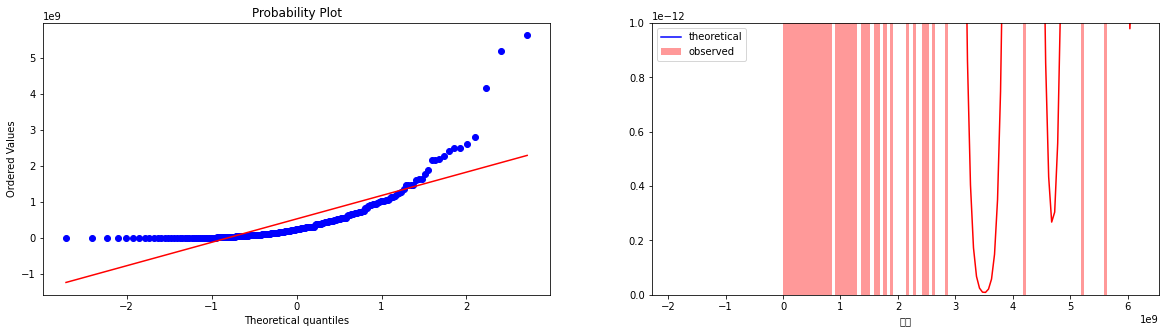

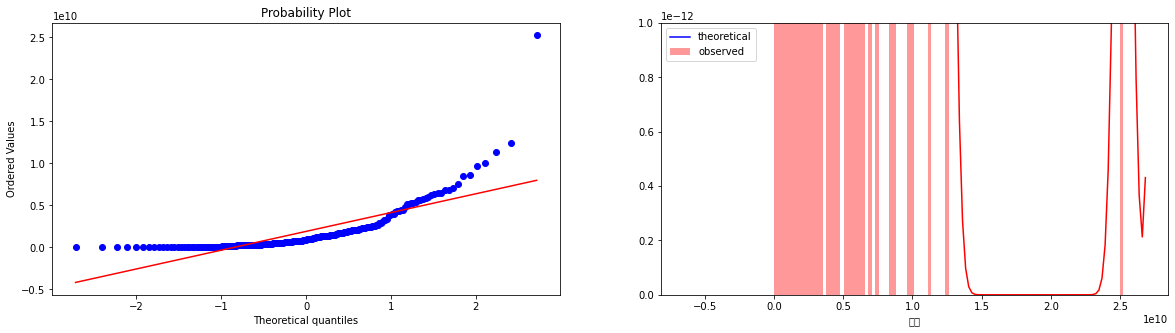

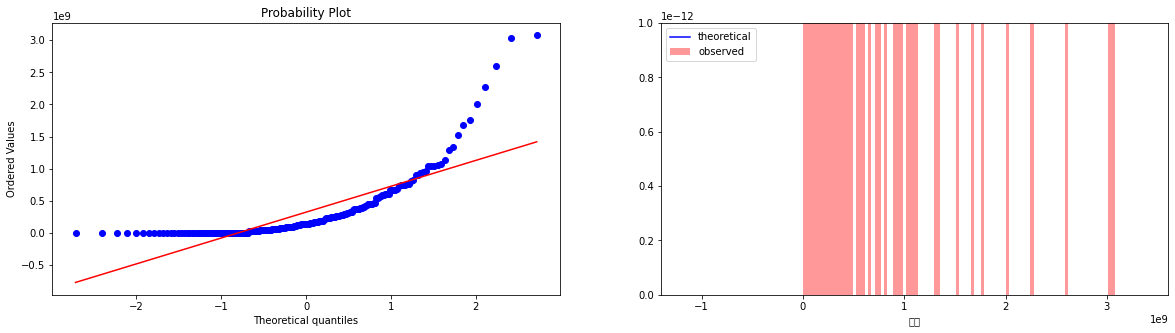

In [50]:
import scipy.stats as stats

rand2 = d['용역']


fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(rand2, dist=stats.norm, plot=ax1)
mu = rand2.mean()
variance = rand2.var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=rand2, bins=100, color="red", label='observed')
ax2.legend()

rand2 = d['공사']



fig = plt.figure(figsize=(20,5),)
ax1 = fig.add_subplot(1, 2, 1)


ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(rand2, dist=stats.norm, plot=ax1,)
mu = rand2.mean()
variance = rand2.var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=rand2, bins=100, color="red", label='observed')
ax2.legend()
rand2 = d['물품']

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(rand2, dist=stats.norm, plot=ax1)
mu = rand2.mean()
variance = rand2.var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')
sns.distplot(ax=ax2, a=rand2, bins=100, color="red", label='observed')
ax2.legend()
plt.show()

## 원래는 이것도 Phase I , Phase II를 진행하여야 하지만, 그건 정규분포를 따를 때 진행하는 것이므로 생략하였다.

## 여기서의 빨간색 칠해진 부분은 alarm이 울린 원인에 해당한다. 밑의 table과 비교하면서 찾아보면 된다. (이건 다변량 정규분포를 따른다고 가정하였기에 우리가 정한 alpha값과 다르게 나올 여지가 있다. 밑에서 붓스트랩을 사용해서 비정규분포에서도 우리가 설정한 Alpha값을 나타낼 수 있게 하였다


## 추가적으로 alpha값을 정하는 것도 하나의 문제인데( alpha에 따라서 beta 의 값이 바뀐다) 이는 정밀도- 재현율 trade-off 까지 관계가 있다.

In [51]:
df_total.iloc[b]

,용역,공사,물품
공고게시일자,,,
2017-06-18,1.168784e+09,5.644728e+09,2.000000e+09
2017-09-24,2.221000e+07,3.133982e+08,2.601346e+09
2019-01-27,1.473872e+09,2.554938e+09,3.076364e+09
2019-04-21,0.000000e+00,2.523270e+10,8.289209e+08
2019-05-19,4.321391e+08,1.130297e+10,2.727273e+07
2019-07-28,1.148914e+09,6.285936e+08,3.039245e+09
2019-11-24,2.603273e+08,1.239693e+10,1.430000e+08
2020-04-12,5.196774e+09,4.485720e+09,6.108900e+08
2020-05-17,4.182063e+09,5.105210e+09,2.381636e+08


In [52]:
df_total.corr() 

,용역,공사,물품
용역,1.000000,0.053794,0.052209
공사,0.053794,1.000000,0.041936
물품,0.052209,0.041936,1.000000


## 거의 상관관계가 없음을 알 수 있다. ->> 다변량 관리도를 사용할 이유가 없다 but 한번에 알 수 있다는 점, bootstrap을 사용해서 비정규데이터에 대해서 대응할 수 있으므로 사용할만한 가치가 있다. 각각 EWMA를 사용하여도 되지만, EWMA같은 경우에는 L, lamda의 값을 잘 지정하여야 분포에 robust하므로 다변량 T_2 관리도를 사용하는 것이 낫다.

In [53]:
df_total.corr().iplot(kind = 'heatmap',colorscale = 'pubu')

In [54]:
cf.help('heatmap')

HEATMAP
Heatmap


Parameters:
    center_scale : float
        Centers the colorscale at a specific value
        Automatically sets the (zmin,zmax) values
    zmax : float
        Defines the maximum range for the z values
        This affects the range for the colorscale
    zmin : float
        Defines the minimum range for the z values
        This affects the range for the colorscale


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-)
        then the scale is inversed.
        Only valid if 'colors' is null.
        see cufflinks.colors.scales() for all available sca

## 앞에서는 정규분포를 따른다고 가정하고 UCL을 생성하였지만, 실제로는 짤린 정규분포를 따르므로 정확하지가 못하다. 그러므로, 추가 예산은 이론적으로만 가능하고(실제로는 정규분포를 따르지 않으므로... 더 안전하게 본다.) Bootstrap을 사용해서 UCL 및 D_i값의 한계선을 그려보도록 하자. 또한, 더 나아가서 좀더 분포에 robust한 관리도를 그려보기 위해 SVDD도 고려해보자. 
## 그뿐만 아니라, 번외의 주제이기는 한데, ARIMA 모형을 공부하면서 추세를 반영한 관리도도 그려볼 여지가 있다. 어떤 기관은 어떤 때에 주로 예산을 많이 사용하는 경우가 있기 때문이다.

In [55]:
import statsmodels.api as sm


a = pd.DataFrame(sm.tsa.acf(df_total['용역']),columns= ['용역'])
b = pd.DataFrame(sm.tsa.acf(df_total['물품']),columns= ['물품'])
c = pd.DataFrame(sm.tsa.acf(df_total['공사']),columns= ['공사'])

In [56]:
# time lag(index) 에 따른 자기상관계수  :: 공사 이외에는 거의 무시할만한 수준인 것을 알 수 있고, 공사 또한 약한 자기상관관계로서 의미가없을 듯 하다.
pd.concat([a,b,c],axis=1).head()
# 이상치를 제외하고 그려보자.

,용역,물품,공사
0,1.000000,1.000000,1.000000
1,0.029379,0.103427,0.241426
2,0.022042,0.002600,0.074503
3,-0.018809,0.019391,0.002647
4,-0.015782,-0.107102,0.198265


In [57]:
c # 이상치를 제외시키고, 다시 자기상관계수를 구해보자.

,공사
0,1.000000
1,0.241426
2,0.074503
3,0.002647
4,0.198265
5,0.102406
6,0.029431
7,-0.006550
8,0.019795
9,-0.098467


In [58]:
df_용역_except = df_total[['용역']][~df_total.reset_index().index.isin([118,123,144])]
df_공사_except = df_total[['공사']][~df_total.reset_index().index.isin([67,71,98])]
df_물품_except = df_total[['물품']][~df_total.reset_index().index.isin([55,81,129])]

In [59]:
sm.tsa.acf(df_용역_except)[0:5]

array([ 1.        ,  0.02884303,  0.0223885 , -0.02251536, -0.01416815])

In [60]:
sm.tsa.acf(df_공사_except)[0:5]

array([1.        , 0.24231892, 0.07345673, 0.01466104, 0.1902863 ])

In [61]:
sm.tsa.acf(df_물품_except)[0:5]

array([ 1.        ,  0.09124185,  0.00706821,  0.02658057, -0.09253904])

In [62]:
from scipy.stats import f
def t_square_bootstrap(data ,bs_size,alpha: float = None):
    
    array_data = np.array(data)

    
    p = array_data.shape[1]
    m = array_data.shape[0]
    n = 1
    col_mean= np.array(data.agg(['mean']))
    mat_cov = data.cov()
    mat_inv_s = np.linalg.inv(mat_cov)  # inverse S
    
    values = []
    for tiny in array_data:
        dif = tiny - col_mean
        value = np.matmul(np.matmul(dif,mat_inv_s),dif.T).ravel().tolist()  # T-square
        values.append(value)
    
#     control limit with bootstrap

    quantile_list = []
    for _ in range(bs_size):
        samples = np.random.choice(np.array(values).ravel(), size=100, replace=True)
        quantile = np.quantile(samples, 1-alpha)
        quantile_list.append(quantile)
    UCL = np.mean(quantile_list)
    LCL = 0


            
    return values, LCL, UCL 

In [64]:
def color_positive_red(x):
        
        
    # copy df to new - original data is not changed
    df = x.copy()

    # select all values to green color
    df.loc[df.loc[:,'a'] > 1,'a'] = 'color: red'
    df.loc[df.loc[:,'b'] > 0,'b'] = 'color: red'



    return df

color_positive_red(abc)

,a,b
0,1,color: red
1,1,color: red
2,1,color: red


In [65]:
def t_square_interpret(code,bs_size,alpha: float = None):
    


    # 색깔 바꾸기 ->> 바꾸는 법 1) 함수를 각 열 에 해당하게 만듦 / 2) index를 만듦 (적용시키는 대상이 되는 각 index) / 3) 각 함수를 만든 각 index에 적용
    def color_positive_red(val):

        if val > d1_cutoff:
            color = 'red'
        else:
            color = 'black'

        return 'color: %s' % color  

    def color_positive_red_2(val):

        if val > d2_cutoff:
            color = 'red'
        else:
            color = 'black'

        return 'color: %s' % color  

    def color_positive_red_3(val):

        if val > d3_cutoff:
            color = 'red'
        else:
            color = 'black'

        return 'color: %s' % color  
    
    

    df_용역 = df_용역_입찰공고_내역_3.loc[df_용역_입찰공고_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_공사 = df_공사_입찰공고_및_진행_내역_3.loc[df_공사_입찰공고_및_진행_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_물품 = df_물품_입찰공고_내역_3.loc[df_물품_입찰공고_내역_3['수요기관코드'] == str(code)][['공고게시일자','추정가격']].copy()
    df_용역 = df_용역[df_용역['추정가격'] != 0].copy()
    df_공사 = df_공사[df_공사['추정가격'] != 0].copy()
    df_물품 = df_물품[df_물품['추정가격'] != 0].copy() 

    df_용역_1w = df_용역.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
    df_공사_1w =df_공사.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
    df_물품_1w =df_물품.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()


    df_용역_1w = df_용역_1w[df_용역_1w.index >= pd.to_datetime('2017-01-07') ].copy()
    df_공사_1w = df_공사_1w[df_공사_1w.index >= pd.to_datetime('2017-01-07') ].copy()
    df_물품_1w = df_물품_1w[df_물품_1w.index >= pd.to_datetime('2017-01-07') ].copy()

    df_total = pd.concat([df_용역_1w, df_공사_1w, df_물품_1w],axis=1)
    df_total.columns = ['용역', '공사' , '물품']
    
    data = df_total.fillna(0).copy()


    # 데이터프레임의 형태는 df_total의 형태와 동일하여야 한다.
    chi2 = alpha
    
    try:
        T_values, LCL, UCL  = t_square_bootstrap(data ,bs_size,chi2)
        
    except np.linalg.LinAlgError as e:
        
        if 'Singular matrix' in str(e):
            print('공사 / 물품 / 용역 중 하나의 열 전체가 0 입니다. 데이터의 형태를 다시 확인하십시오')
            return data
        else:
            print('행렬 계산 중 무언가 잘못되었습니다.')
            raise
        
    except ZeroDivisionError:
        print('데이터의 형태가 이상합니다 데이터를 확인하십시오')
        return data
    
    else:
        df_t = pd.DataFrame(T_values,columns=['data_point'])
        df_t['ucl'] = UCL
        df_t['lcl'] = LCL
        df_t['control'] = 0

        for i in range(df_t.shape[0]):
            if df_t.loc[i,'data_point'] > UCL:
                df_t.loc[i,'control']  = 'red'
            else:
                df_t.loc[i,'control']  = 'blue'

        lst_red = df_t[df_t['control'] == 'red'].index.tolist()
        cutoff = scipy.stats.chi2(1).ppf(1-chi2)

        lst_T_i= []

        for col in data.columns.tolist():
            df_test = data.loc[~data.index.isin(lst_red), data.columns != col]
            lst_T_i.append( np.array(t_square_bootstrap(df_test ,bs_size,chi2)[0]).ravel())

        T_values = [i[0] for i in T_values]

        d_1 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[0])])
        d_2 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[1])])
        d_3 = pd.Series([a-b for a,b in zip(T_values,lst_T_i[2])])
        
        quantile_list_d1 = []
        quantile_list_d2 = []
        quantile_list_d3 = []
        
        # di별 cutoff 계산을 위한 bootstrap
        for _ in range(bs_size):
            samples_d1 = np.random.choice(np.array(d_1).ravel(), size=100, replace=True)
            samples_d2 = np.random.choice(np.array(d_2).ravel(), size=100, replace=True)
            samples_d3 = np.random.choice(np.array(d_3).ravel(), size=100, replace=True)
            quantile_d1 = np.quantile(samples_d1, 1-alpha)
            quantile_d2 = np.quantile(samples_d2, 1-alpha)
            quantile_d3 = np.quantile(samples_d3, 1-alpha)
            quantile_list_d1.append(quantile_d1)
            quantile_list_d2.append(quantile_d2)
            quantile_list_d3.append(quantile_d3)

        # cutoff 계산
        d1_cutoff = np.mean(quantile_list_d1)
        d2_cutoff = np.mean(quantile_list_d2)
        d3_cutoff = np.mean(quantile_list_d3)


        df_wee = pd.concat([d_1,d_2,d_3],axis=1)
        lst_D_i = []

        for j in lst_red:

            lst_D_i.append(df_wee.iloc[j,:].values.tolist()) 

        df_outlier = pd.DataFrame(lst_D_i,index=lst_red,columns=data.columns)



        fig = go.Figure()

        fig.add_trace(go.Scatter(x = df_t.index, y =df_t['data_point'],mode = 'lines+markers',name= 'Data_point',text =df_total.index.astype('str').ravel(),
                                         marker=dict(
                                color=df_t['control'],
                                size=7)))


        fig.add_trace(go.Scatter(x = df_t.index ,y = df_t['lcl']  ,mode= 'lines',name= 'LCL',marker_color = 'gray'))
        fig.add_trace(go.Scatter(x = df_t.index ,y = df_t['ucl']  ,mode= 'lines',name= 'UCL'))



        fig.update_layout({
            'title' : code+'기관의 2017 ~ 2020의 물품 / 용역 / 공사의 통합 T_square 관리도 (Apply bootstraps)'
        })

        fig.show()
        
        df_outlier = pd.concat([df_outlier, data.reset_index().iloc[lst_red,1:]] , axis= 1)
        df_outlier.columns = ['용역_t','공사_t','물품_t','용역_real','공사_real','물품_real']
        idx = pd.IndexSlice
        slice_ = idx[:, '용역_t']
        s = df_outlier.style.applymap(color_positive_red , subset=slice_) 
        slice_ = idx[:, '공사_t']
        s.applymap(color_positive_red, subset=slice_)
        slice_ = idx[:, '물품_t']
        s.applymap(color_positive_red, subset=slice_)

#         print('##### d1 cutoff : ',d1_cutoff)
#         print('##### d2 cutoff : ',d2_cutoff)
#         print('##### d3 cutoff : ',d3_cutoff)
        

        return data, lst_red, s, data.reset_index().loc[~data.reset_index().index.isin(lst_red),:],df_total

In [66]:
a, lst_out ,c ,df_except,d= t_square_interpret('4930000',1000,alpha=0.01)
c
# t_square_interpret('7900038',alpha=0.01)

,용역_t,공사_t,물품_t,용역_real,공사_real,물품_real
119,1.310797,69.814456,0.529574,0.000000,25232700194.000000,828920925.000000
170,32.896708,0.361554,0.065613,5196773633.000000,4485720000.000000,610889999.000000
196,40.808594,0.862869,0.083819,5634090904.000000,232012728.000000,323863636.000000


In [67]:

a, lst_out ,c ,df_except_2,d = t_square_interpret('6460000',1000,alpha=0.01)
a, lst_out ,c ,df_except_1,d = t_square_interpret('B500001',1000,alpha=0.01)
a, lst_out ,c ,df_except,d =t_square_interpret('4930000',1000,alpha=0.01)

In [68]:
idx_전체 = df_용역_물품_공사['수요기관코드'].value_counts().head(100).index.tolist()

In [69]:
df_except.shape

(206, 4)

In [70]:
df_except.head()

,공고게시일자,용역,공사,물품
0,2017-01-08,312449054.0,0.000000e+00,0.0
1,2017-01-15,273394509.0,9.245000e+07,382520909.0
2,2017-01-22,840780907.0,1.666125e+09,0.0
3,2017-01-29,16418181.0,3.294964e+08,45654545.0
4,2017-02-05,0.0,2.936454e+07,0.0


# 자기상관관계
## 자기상관관계가 존재하는지 알아보자. 만약에 있다면, 이것까지 고려하여 관리도를 구축하여야 한다.
## 모든 기관을 확인을 해보아야 겠지만, 일단은 표본을 몇개 뽑아보고 계산해보기로 하자.

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x =  df_except['공고게시일자'], y = df_except['용역'], name='용역'))
fig.add_trace(go.Scatter(x =  df_except['공고게시일자'], y = df_except['공사'], name='공사'))
fig.add_trace(go.Scatter(x =  df_except['공고게시일자'], y = df_except['물품'], name='물품'))
fig.add_trace(go.Scatter(x =  df_except['공고게시일자'], y = df_except['물품'] + df_except['공사'] + df_except['용역'], name='전체'))


fig.show()
## trend는 없어보인다. 그러나 확인하자.

## 몇 개의 표본을 뽑아보니, 자기상관계수가 거의 약한 것을 확인할 수 있다. 모든 기관에 대해서 실행하여보아야 겠지만( 함수 만들어서 모든 기관에 대해서 실행가능하다 ; 단 데이터 수가 일정 수 이상일 때...) 표본을 몇 개 뽑아보니 자기상관관계가 없음을 확인할 수 있었다

In [72]:
# Timelag 에 따른 자기상관관계 ; 약한 상관관계만 존재한다..! ->> 자기상관관계를 고려할 필요가 없을 듯 하다
j = [k for k in range(60)]
df_timelag = pd.DataFrame([[df_except['용역'].autocorr(i) for i in j ] , [df_except['공사'].autocorr(i) for i in j ] ,[df_except['물품'].autocorr(i) for i in j ]],
            index= ['용역','공사','물품']).T


In [73]:
df_timelag

,용역,공사,물품
0,1.000000,1.000000,1.000000
1,-0.029503,0.226164,0.100519
2,0.080140,0.081489,0.027957
3,-0.011574,0.031982,0.022055
4,-0.045685,0.168582,-0.158170
5,0.154094,0.024836,-0.044559
6,-0.049158,-0.002230,0.063105
7,-0.042717,-0.057747,0.015930
8,0.172939,-0.026484,0.000703
9,-0.082852,-0.114722,-0.015388


In [74]:
df_timelag[(df_timelag['용역'] >= 0.20) | (df_timelag['물품'] >= 0.30) | (df_timelag['공사'] >= 0.30)]

,용역,공사,물품
0,1.0,1.0,1.0


In [75]:
def timelag(df_except,lag):
    j = [k for k in range(lag)]
    df_timelag = pd.DataFrame([[df_except['용역'].autocorr(i) for i in j ] , [df_except['공사'].autocorr(i) for i in j ] ,[df_except['물품'].autocorr(i) for i in j ]],
                index= ['용역','공사','물품']).T
    return df_timelag[(df_timelag['용역'] >= 0.40) | (df_timelag['물품'] >= 0.40) | (df_timelag['공사'] >= 0.40)]

In [76]:

timelag(df_except,lag = 70)

,용역,공사,물품
0,1.0,1.0,1.0


In [77]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm


In [78]:


def check_autocorrelation_2(df):
    df = df.reset_index()
    return sm.stats.acorr_ljungbox(df[['용역']],lags= 50)
    
#     return pd.concat([df_sm[df_sm['lb_pvalue'] < 0.05],df_sm_1[df_sm_1['lb_pvalue'] < 0.05],df_sm_2[df_sm_2['lb_pvalue'] < 0.05]],axis=0)

In [79]:
check_autocorrelation_2(df_except) # 귀무가설 : timelag (tim)

(array([ 0.18130891,  1.5223343 ,  1.54907263,  1.96704974,  6.71966371,
         7.20549506,  7.5736554 , 13.30870385, 14.63344721, 14.70430402,
        16.28010693, 16.29822656, 20.62639731, 20.90440795, 20.91578648,
        23.61614479, 23.87036444, 25.07965813, 25.27113625, 25.31502399,
        25.63719324, 26.09131642, 26.49529088, 26.49667613, 31.64416153,
        32.21977677, 32.41025887, 32.88509947, 33.39384209, 37.1364593 ,
        39.27288067, 39.43029045, 40.90789227, 41.56127611, 41.56220108,
        42.01325599, 43.28923666, 45.65269504, 46.01222958, 47.19802058,
        49.78137072, 49.94130138, 50.16294351, 50.66306589, 50.66644314,
        52.52537838, 52.63560411, 52.65115273, 53.09433051, 53.65802548]),
 array([0.67025079, 0.46712091, 0.67099157, 0.74181947, 0.24233792,
        0.30226067, 0.37168361, 0.10166028, 0.10150925, 0.14322004,
        0.13104645, 0.17795537, 0.08065434, 0.10410735, 0.13954162,
        0.09822998, 0.12300029, 0.12273767, 0.15180967, 0.189643

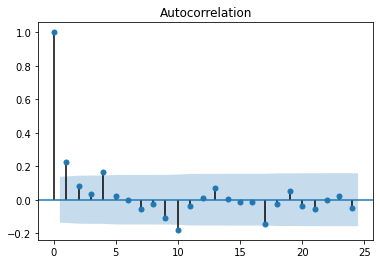

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(df_except['공사']) # 자기상관이 존재한다.

## 자기상관이 있음을 확인할 수 있다.... 경우에 따라서 다르게 적용시키는 관리도가 필요할 듯하다.

# Clusering 
## 기관에 상관없이 의 용역 / 공사 / 물품의 데이터를 3차원 데이터로 생각하여 plot 시켜보자. 이때, 각각의 data point는 공고게시일자에 해당되며, 좌표는 용역 / 공사 / 물품에 해당한다.
## 관리도를 벗어나는 outlier를 빼고 data frame(df_except)를 보았다.

In [81]:
df_yong = df_용역_물품_공사[df_용역_물품_공사['구분'] == '용역'][['추정가격']]
df_mul = df_용역_물품_공사[df_용역_물품_공사['구분'] == '용역'][['추정가격']]
df_gong = df_용역_물품_공사[df_용역_물품_공사['구분'] == '용역'][['추정가격']]

In [82]:
df_except.reset_index().loc[~df_except.index.isin(lst_out)] 

,index,공고게시일자,용역,공사,물품
0,0,2017-01-08,3.124491e+08,0.000000e+00,0.0
1,1,2017-01-15,2.733945e+08,9.245000e+07,382520909.0
2,2,2017-01-22,8.407809e+08,1.666125e+09,0.0
3,3,2017-01-29,1.641818e+07,3.294964e+08,45654545.0
4,4,2017-02-05,0.000000e+00,2.936454e+07,0.0
...,...,...,...,...,...
201,204,2020-12-06,6.826300e+08,2.024784e+09,72130909.0
202,205,2020-12-13,4.615000e+08,4.334860e+09,674611361.0
203,206,2020-12-20,2.497714e+09,3.213959e+09,280672907.0
204,207,2020-12-27,0.000000e+00,1.970800e+08,0.0


In [83]:
df_except.corr() # 여전히 상관관계는 없음을 알수있다.

,용역,공사,물품
용역,1.000000,0.108579,0.048446
공사,0.108579,1.000000,-0.002338
물품,0.048446,-0.002338,1.000000


In [84]:
df_except

,공고게시일자,용역,공사,물품
0,2017-01-08,3.124491e+08,0.000000e+00,0.0
1,2017-01-15,2.733945e+08,9.245000e+07,382520909.0
2,2017-01-22,8.407809e+08,1.666125e+09,0.0
3,2017-01-29,1.641818e+07,3.294964e+08,45654545.0
4,2017-02-05,0.000000e+00,2.936454e+07,0.0
...,...,...,...,...
204,2020-12-06,6.826300e+08,2.024784e+09,72130909.0
205,2020-12-13,4.615000e+08,4.334860e+09,674611361.0
206,2020-12-20,2.497714e+09,3.213959e+09,280672907.0
207,2020-12-27,0.000000e+00,1.970800e+08,0.0


In [85]:
# 일단은 Clustering 이전으로 그려보았다.
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=df_except['용역'], y=df_except['공사'], z= df_except['물품'])


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [86]:
df_except

,공고게시일자,용역,공사,물품
0,2017-01-08,3.124491e+08,0.000000e+00,0.0
1,2017-01-15,2.733945e+08,9.245000e+07,382520909.0
2,2017-01-22,8.407809e+08,1.666125e+09,0.0
3,2017-01-29,1.641818e+07,3.294964e+08,45654545.0
4,2017-02-05,0.000000e+00,2.936454e+07,0.0
...,...,...,...,...
204,2020-12-06,6.826300e+08,2.024784e+09,72130909.0
205,2020-12-13,4.615000e+08,4.334860e+09,674611361.0
206,2020-12-20,2.497714e+09,3.213959e+09,280672907.0
207,2020-12-27,0.000000e+00,1.970800e+08,0.0


In [87]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

ks = range(1,10)
inertias = list()
df_3d = df_except[['용역','공사','물품']]
for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', random_state=1)
    model.fit_predict(df_3d)
    inertias.append(model.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter( x=list(ks), y=inertias, mode='lines+markers' ))
fig.show()
# 4부터 기울기가 점점 줄어든 것을 알 수 있다 ->> 4개의 집단으로 묶는 것이 제일 낫다.

In [88]:
model = KMeans(n_clusters=4, init='k-means++', random_state=1)
y_means = model.fit_predict(df_3d)

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=df_except['용역'], y=df_except['공사'], z= df_except['물품'],color= y_means)


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [89]:
from sklearn.cluster import AgglomerativeClustering
df_3d = df_except[['용역','공사','물품']]
df_3d_1 = df_except_1[['용역','공사','물품']]

model = AgglomerativeClustering(n_clusters=5)
y_means = model.fit_predict(df_3d)


import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=df_except['용역'], y=df_except['공사'], z= df_except['물품'],color= y_means)


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [90]:
df_3d = df_except[['용역','공사','물품']].copy()
df_3d_1 = df_except_1[['용역','공사','물품']].copy()

In [91]:
df_3d_all = (df_3d + df_3d_1)
df_3d_all

,용역,공사,물품
0,3.124491e+08,0.000000e+00,3.120000e+08
1,2.733945e+08,9.245000e+07,6.923679e+08
2,8.407809e+08,1.666125e+09,0.000000e+00
3,1.641818e+07,3.294964e+08,2.451065e+08
4,0.000000e+00,2.936454e+07,1.083011e+09
...,...,...,...
204,2.325060e+10,3.725877e+09,1.120023e+10
205,9.557684e+09,4.602885e+09,1.848611e+09
206,NaN,NaN,NaN
207,NaN,NaN,NaN


In [92]:
df_3d_all = (df_except[['용역','공사','물품']] + df_except_1[['용역','공사','물품']]+ df_except_2[['용역','공사','물품']]).fillna(0) + df_except_2[['용역','공사','물품']].fillna(0)

In [93]:
df_3d_all = df_3d_all[(df_3d_all['용역'] != 0) | (df_3d_all['용역'] != 0) |(df_3d_all['용역'] != 0)].copy()

In [94]:
df_3d_all.isnull().sum()

용역    2
공사    2
물품    2
dtype: int64

In [95]:
df_3d_all = df_3d_all.dropna()

In [96]:
df_3d_all

,용역,공사,물품
0,3.581845e+09,6.118153e+09,3.120000e+08
1,3.229411e+09,1.777890e+09,3.467914e+09
2,1.788655e+09,1.666125e+09,0.000000e+00
3,4.736291e+08,3.835513e+10,2.304388e+09
4,9.976447e+09,6.694636e+07,1.083011e+09
...,...,...,...
204,2.788660e+10,3.941263e+09,1.157352e+10
205,2.591978e+10,5.723249e+09,3.247004e+09
206,1.447971e+09,2.148973e+08,0.000000e+00
207,1.475559e+09,1.032439e+09,0.000000e+00


## 여기서는 (3개의 기관을 합쳤음) 의미가 없어보인다....! 각 기관마다 다르겠지만..

In [97]:
df_용역_물품_공사.head()

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,구분
0,나라장터(G2B),2020-03-31,자체조달,0,전라북도 정읍시,4690000,Y,N,N,87100000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,NaN,전라북도[45000],용역
1,나라장터(G2B),2020-03-31,자체조달,0,울산광역시 북구,3720000,N,N,N,42171818.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,[학술.연구용역(1169)],"부산광역시[26000], 울산광역시[31000], 경상남도[48000]",용역
2,나라장터(G2B),2020-03-31,자체조달,0,서울특별시,6110000,N,N,N,50000000.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,NaN,서울특별시[11000],용역
3,나라장터(G2B),2020-03-31,자체조달,1,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,Y,62630000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000],용역
4,나라장터(G2B),2020-03-31,자체조달,0,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,N,70980000.0,전자입찰,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000],용역


In [98]:
df_test = df_용역_물품_공사.groupby(['구분','공고게시일자']).sum()

In [99]:
df_test

입찰공고차수          추정가격
구분 공고게시일자                          
공사 2017-01-02      29  1.102037e+11
   2017-01-03      29  6.520907e+10
   2017-01-04      33  1.097953e+11
   2017-01-05      48  9.636830e+10
   2017-01-06      35  1.065961e+11
...               ...           ...
용역 2020-12-28      64  1.347658e+11
   2020-12-29      90  2.468239e+11
   2020-12-30      72  1.369768e+11
   2020-12-31      75  1.152136e+11
   2021-01-01       2  1.819716e+08

[4334 rows x 2 columns]

## 입찰공고 차수도 더해서 3D 를 그려보았고, T_2 square를 적용시켜 보았다.

In [100]:
df_a = df_test.loc['공사']
df_b = df_test.loc['물품']
df_c = df_test.loc['용역']
df_a.reset_index(inplace = True)
df_b.reset_index(inplace = True)
df_c.reset_index(inplace = True)
df_a = df_a.groupby(pd.Grouper(key = '공고게시일자',freq = '1w')).agg({'sum'})
df_b = df_b.groupby(pd.Grouper(key = '공고게시일자',freq = '1w')).agg({'sum'})
df_c = df_c.groupby(pd.Grouper(key = '공고게시일자',freq = '1w')).agg({'sum'})

In [101]:
df_a['구분'] = '공사'
df_b['구분'] = '물품'
df_c['구분'] = '용역'

In [102]:
df_abc = pd.concat([df_a,df_b,df_c])

In [103]:
df_abc.head()

,입찰공고차수,추정가격,구분
,sum,sum,
공고게시일자,,,
2017-01-08,176,4.888294e+11,공사
2017-01-15,234,4.300649e+11,공사
2017-01-22,194,1.339432e+12,공사
2017-01-29,154,4.066774e+11,공사
2017-02-05,182,4.028881e+11,공사


In [104]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( x=df_abc.index, y=df_abc['입찰공고차수']['sum'], z= df_abc['추정가격']['sum'],
                    color=df_abc['구분'],symbol=df_abc['구분'],labels =df_abc['구분'], opacity=0.7)


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()



In [105]:
df_abc_2 = df_abc.copy()

In [106]:
df_abc_2 = df_abc_2.reset_index().copy()

In [107]:
df_abc_2.columns = ['공고게시일자','입찰공고차수','추정가격','구분']

In [108]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( df_abc_2, x='공고게시일자', y='입찰공고차수', z= '추정가격',
                    color=df_abc_2['구분'],symbol=df_abc_2['구분'],labels =df_abc_2['구분'], opacity=0.7,
                   title =' x: 공고게시일자,y : 입찰공고차수, z: 추정가격 ')


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


In [109]:
df_abc_2.corr()

,입찰공고차수,추정가격
입찰공고차수,1.000000,-0.010109
추정가격,-0.010109,1.000000


In [110]:
df_abc_3 = pd.concat([df_abc_2['추정가격'],df_abc_2['입찰공고차수'],df_abc_2['구분']],axis=1).copy()

df_abc_3.index =  df_abc_2['공고게시일자']
df_abc_3.head()

,추정가격,입찰공고차수,구분
공고게시일자,,,
2017-01-08,4.888294e+11,176,공사
2017-01-15,4.300649e+11,234,공사
2017-01-22,1.339432e+12,194,공사
2017-01-29,4.066774e+11,154,공사
2017-02-05,4.028881e+11,182,공사


In [111]:
lst_new ,l, u = t_square_bootstrap(pd.concat([df_abc_3['추정가격'],df_abc_3['입찰공고차수']],axis=1),bs_size= 1000 ,alpha=0.05)

In [112]:
threshold = pd.DataFrame(np.array(lst_new).ravel(),index= df_abc_3.index )


In [113]:
quantile_list_d1= []
for _ in range(1000):
    samples_d1 = np.random.choice(np.array(threshold[0]).ravel(), size=100, replace=True)

    quantile_d1 = np.quantile(samples_d1, 1-0.05)

    quantile_list_d1.append(quantile_d1)
mn = np.mean(quantile_list_d1)

In [114]:
idx = threshold[threshold[0] > mn].index

In [115]:
df_abc_4 = df_abc_3.loc[~df_abc_3.index.isin(idx),:].reset_index().copy()

In [116]:
df_abc_4.head()

,공고게시일자,추정가격,입찰공고차수,구분
0,2017-01-08,4.888294e+11,176,공사
1,2017-01-15,4.300649e+11,234,공사
2,2017-01-22,1.339432e+12,194,공사
3,2017-01-29,4.066774e+11,154,공사
4,2017-02-05,4.028881e+11,182,공사


In [117]:
## 이상치를 제외시킨 추정가격 - 입찰공고차수 3d 모양.
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d( df_abc_4, x='공고게시일자', y='입찰공고차수', z= '추정가격',
                    color=df_abc_4['구분'],symbol=df_abc_4['구분'],labels =df_abc_4['구분'], opacity=0.7,
                   title =' x: 공고게시일자,y : 입찰공고차수, z: 추정가격 ')


fig.update_traces(marker_size=3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


In [118]:
df_abc_4.corr()

,추정가격,입찰공고차수
추정가격,1.000000,0.118268
입찰공고차수,0.118268,1.000000


In [119]:
df_total

,용역,공사,물품
공고게시일자,,,
2017-01-08,3.124491e+08,0.000000e+00,0.0
2017-01-15,2.733945e+08,9.245000e+07,382520909.0
2017-01-22,8.407809e+08,1.666125e+09,0.0
2017-01-29,1.641818e+07,3.294964e+08,45654545.0
2017-02-05,0.000000e+00,2.936454e+07,0.0
...,...,...,...
2020-12-06,6.826300e+08,2.024784e+09,72130909.0
2020-12-13,4.615000e+08,4.334860e+09,674611361.0
2020-12-20,2.497714e+09,3.213959e+09,280672907.0


In [120]:
fig = go.Figure()


fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_total['용역'], y= df_total['공사'], z=df_total['물품'],
                                   mode='markers',
                              marker=dict(
        size=4,
        color=df_total,
        colorscale='Viridis',)))
fig.show()